In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Import data into Python environment
df=pd.read_csv('Comcast_telecom_complaints_data.csv')
df.head(5)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [4]:
df.isna().sum()

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [6]:
df['month']=pd.to_datetime(df['Date_month_year']).dt.month_name()
df['date']=pd.to_datetime(df['Date_month_year']).dt.day

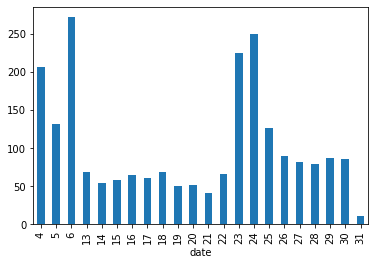

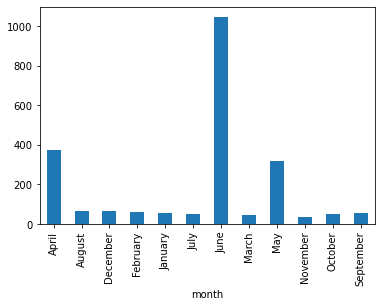

In [7]:
#Provide the trend chart for the number of complaints at monthly and daily granularity levels.
df.groupby(['date'])['Customer Complaint'].count().plot(kind='bar')
plt.show()

df.groupby(['month'])['Customer Complaint'].count().plot(kind='bar')
plt.show()

In [8]:
#Provide a table with the frequency of complaint types.
df['Customer Complaint'].value_counts().to_frame().reset_index()

,index,Customer Complaint
0,Comcast,83
1,Comcast Internet,18
2,Comcast Data Cap,17
3,comcast,13
4,Data Caps,11
...,...,...
1836,ComCast cable In Maryland,1
1837,Comcast charged me higher than quoted on the p...,1
1838,Comcast refuses to credit erroneous overcharge...,1
1839,Comcast Hard Inquiries,1


In [11]:
#Which complaint types are maximum i.e., around internet, network issues, or across any other domains
df['Customer Complaint'].value_counts().head()


Comcast             83
Comcast Internet    18
Comcast Data Cap    17
comcast             13
Data Caps           11
Name: Customer Complaint, dtype: int64

In [12]:
#Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
df['Status']=df['Status'].apply(lambda x: 'Open' if ((x=='Open') | (x=='Pending')) else 'Closed' )

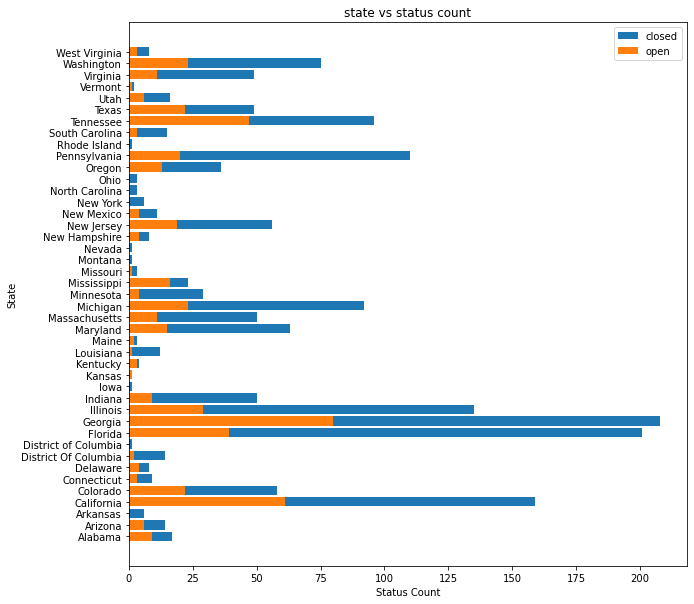

In [13]:
# Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3.

op=df[df['Status']=='Open'].groupby(['State'])['Status'].count().to_frame().reset_index()
cl=df[df['Status']=='Closed'].groupby(['State'])['Status'].count().to_frame().reset_index()

fig=plt.figure(figsize=(10,10))
plt.barh(cl.State, cl.Status)
plt.barh(op.State, op.Status)

plt.ylabel("State", size=10)
plt.xlabel("Status Count")
plt.legend(["closed", "open"])
plt.title("state vs status count")
plt.show()
              

In [14]:
#Which state has the maximum complaints
print('Georgia')

Georgia


In [16]:
# Which state has the highest percentage of unresolved complaints
print('Georgia')

Georgia


In [17]:
#Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.
df[df['Status']=='Closed'].groupby('Status')['Received Via'].value_counts(normalize=True)*100

Status  Received Via      
Closed  Customer Care Call    50.615114
        Internet              49.384886
Name: Received Via, dtype: float64